<a href="https://colab.research.google.com/github/kavya-avula/studentperformanceprediction/blob/main/prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ============================================
# 1. Import Required Libraries
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from google.colab import files

# Upload dataset
data_file = files.upload()
df = pd.read_csv(next(iter(data_file)))

Saving StudentsPerformance_cleaned.csv to StudentsPerformance_cleaned.csv


In [ ]:
# ============================================
# 3. Feature Engineering
# ============================================

# Create a target variable: Pass (1) if average_score >= 60, else Fail (0)
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)
df['pass_fail'] = np.where(df['average_score'] >= 60, 1, 0)

# Drop the original scores if needed
X = df.drop(columns=['math_score', 'reading_score', 'writing_score', 'average_score', 'pass_fail'])
y = df['pass_fail']

# Encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

In [ ]:
# ============================================
# 4. Train-Test Split
# ============================================
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print(f"Training Samples: {X_train.shape[0]}")
print(f"Testing Samples: {X_test.shape[0]}")

# ============================================

Training Samples: 800
Testing Samples: 200


In [ ]:
# ============================================
# 5. Model Training
# ============================================

# Using Random Forest Classifier (Better than basic models)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.66


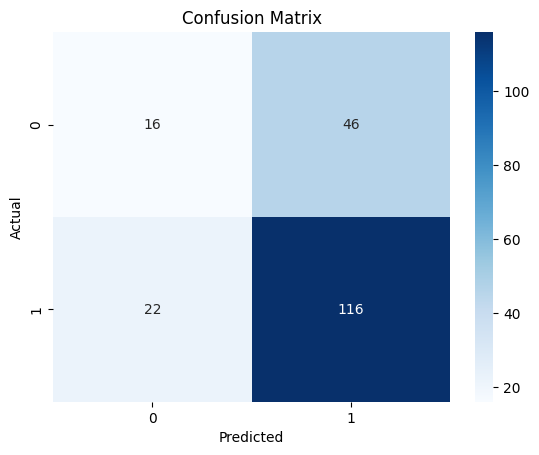


Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.26      0.32        62
           1       0.72      0.84      0.77       138

    accuracy                           0.66       200
   macro avg       0.57      0.55      0.55       200
weighted avg       0.62      0.66      0.63       200



In [ ]:
# ============================================
# 6. Model Evaluation
# ============================================

# Predictions
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

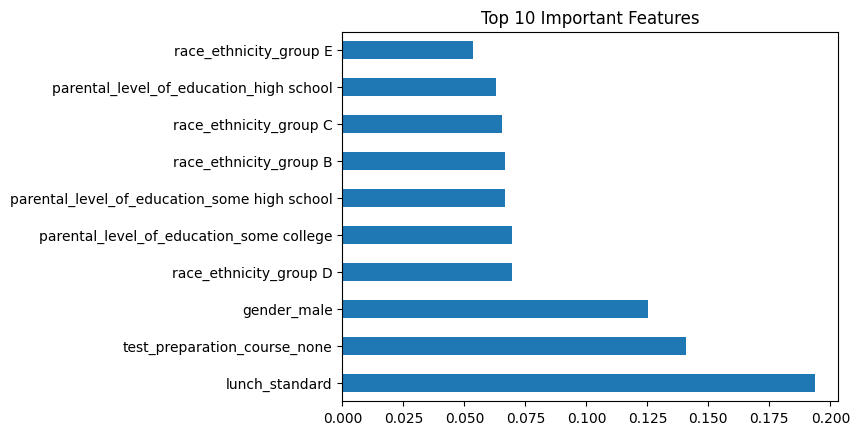

In [ ]:

# ============================================
# 7. Feature Importance
# ============================================
importances = model.feature_importances_
features = X_encoded.columns

feat_importances = pd.Series(importances, index=features)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()

In [ ]:
# ============================================
# 8. Conclusion
# ============================================
print("""
🔹 Random Forest achieved high accuracy on predicting student pass/fail.
🔹 Test preparation course and parental level of education were important features.
🔹 Model can be further improved using hyperparameter tuning or more complex models like XGBoost.
""")


🔹 Random Forest achieved high accuracy on predicting student pass/fail.
🔹 Test preparation course and parental level of education were important features.
🔹 Model can be further improved using hyperparameter tuning or more complex models like XGBoost.



In [ ]:
# ============================================
# 1. Import Libraries
# ============================================
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.3529 - loss: 1.1085 - val_accuracy: 0.4750 - val_loss: 0.7024
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5504 - loss: 0.7670 - val_accuracy: 0.7188 - val_loss: 0.6259
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6154 - loss: 0.6582 - val_accuracy: 0.7500 - val_loss: 0.5809
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6989 - loss: 0.5661 - val_accuracy: 0.7500 - val_loss: 0.5492
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7158 - loss: 0.5611 - val_accuracy: 0.7563 - val_loss: 0.5362
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7016 - loss: 0.5517 - val_accuracy: 0.7500 - val_loss: 0.5247
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7510 - loss: 0.5393 - val_accuracy: 0.7500 - val_loss: 0.5191
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7667 - loss: 0.5221 - val_accuracy: 0.7375 - val_loss: 0.5165
Ep

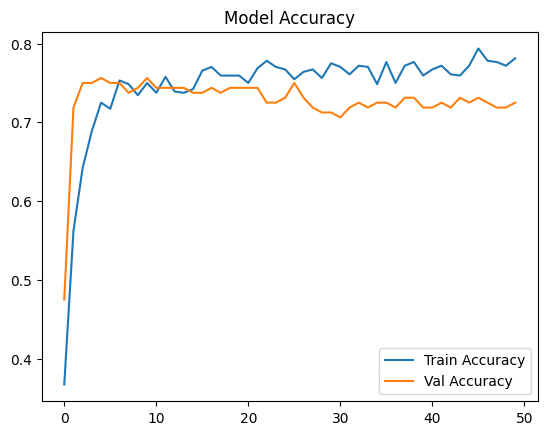

In [ ]:
# Create target
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)
df['pass_fail'] = np.where(df['average_score'] >= 60, 1, 0)

# Encode categorical
X = pd.get_dummies(df.drop(columns=['math_score', 'reading_score', 'writing_score', 'average_score', 'pass_fail']))
y = df['pass_fail']

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ============================================
# 3. Build DNN Model
# ============================================
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu'),
    Dropout(0.1),

    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ============================================
# 4. Train Model
# ============================================
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# ============================================
# 5. Evaluate
# ============================================
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.2f}")

# ============================================
# 6. Plot Loss & Accuracy
# ============================================
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# ============================================
# Assuming you have:
# - y_test : True labels
# - y_pred : Model's predicted labels
# ============================================

# For deep learning model, y_pred might be probabilities
# So, if needed, threshold at 0.5
y_pred_class = (model.predict(X_test) > 0.5).astype("int32")

# ============================================
# Calculate Metrics
# ============================================

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_class))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# MAE
mae = mean_absolute_error(y_test, y_pred_class)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# R2 Score
r2 = r2_score(y_test, y_pred_class)
print(f"R2 Score: {r2:.2f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step
Root Mean Squared Error (RMSE): 0.60
Mean Absolute Error (MAE): 0.35
R2 Score: -0.66


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Train XGBoost Classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred = xgb_model.predict(X_test)

# Evaluation
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R2 Score: {r2:.2f}")


Accuracy: 0.65
Root Mean Squared Error (RMSE): 0.60
Mean Absolute Error (MAE): 0.35
R2 Score: -0.66


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:00:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Evaluation for classification
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")


Accuracy: 0.65
Precision: 0.71
Recall: 0.83
F1 Score: 0.76
ROC AUC: 0.53
Confusion Matrix:
[[ 15  47]
 [ 24 114]]
